In [1]:
from gfn import GFNAgent

In [14]:
agent = GFNAgent(epochs=200)

First, let's take a look at the environment. The default is a 2D 8x8 grid with high reward in the corners.

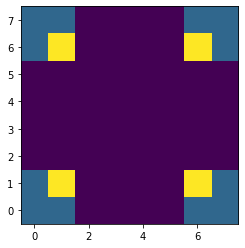

In [3]:
agent.env.plot_reward_2d()

We can also look at the model structure. Notice that in this implementation, the learned parameter `z0` is separate from the neural net, and that the neural net has two output "heads": `foward_policy` and `backward_policy`. 

In [4]:
agent.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 2, 8)]       0           []                               
                                                                                                  
 flatten (Flatten)              (None, 16)           0           ['input[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 32)           544         ['flatten[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 32)           1056        ['dense_1[0][0]']                
                                                                                              

In [5]:
agent.z0

<tf.Variable 'z0:0' shape=() dtype=float32, numpy=0.0>

For this demonstration, we'll just show that the GFlowNet can learn a policy that generates trajectories proportional to the reward. To do that, we'll first sample a large training set using the untrained, random policy.

157/157 [==============================] - 1s 1ms/step


2022-05-04 20:47:32.123047: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


157/157 [==============================] - 0s 1ms/step


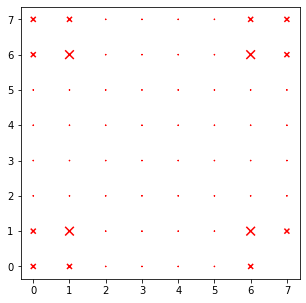

In [6]:
agent.sample(5000)
agent.plot_sampled_data_2d()

In [7]:
u_modes, u_positions = agent.count_modes()
print(f'There are {u_modes} unique modes and {u_positions} unique positions in the training data.')

There are 4 unique modes and 63 unique positions in the training data.


Before training, the policy is uniform. The likelihood of transitioning vertically or laterally (arrows) or terminating (red octogon) is essentially uniform at every point.

The probability of terminating at each position is plotted below, and we can see that without training, it looks nothing like the reward environment we plotted above. The termination probabilities are large enough, that any trajectory is unlikely to leave the origin (bottom left).

2/2 [==============================] - 0s 2ms/step


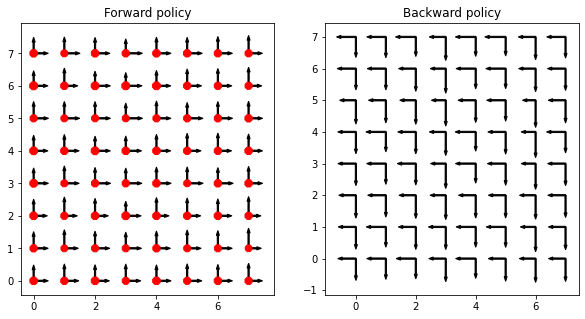

In [8]:
agent.plot_policy_2d()

63/63 [==============================] - 0s 1ms/step


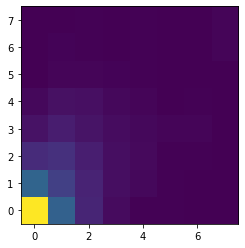

In [9]:
l1_error_before = agent.compare_env_to_model_policy()

Let's train it and see if we can do better!

In [10]:
agent.train()

Start training...
Epoch: 0 Loss: 5.823361873626709
Epoch: 9 Loss: 1.9640847444534302
Epoch: 18 Loss: 1.6309585571289062
Epoch: 27 Loss: 1.0532681941986084
Epoch: 36 Loss: 0.7600653767585754
Epoch: 45 Loss: 0.6382139921188354
Epoch: 54 Loss: 0.6046980619430542
Epoch: 63 Loss: 0.5620511770248413
Epoch: 72 Loss: 0.4427354037761688
Epoch: 81 Loss: 0.6501584649085999
Epoch: 90 Loss: 0.3121155798435211
Epoch: 99 Loss: 0.27125149965286255
Epoch: 108 Loss: 0.32772353291511536
Epoch: 117 Loss: 0.30555203557014465
Epoch: 126 Loss: 0.25774070620536804
Epoch: 135 Loss: 0.21889758110046387
Epoch: 144 Loss: 0.17800186574459076
Epoch: 153 Loss: 0.4238590598106384
Epoch: 162 Loss: 0.09405914694070816
Epoch: 171 Loss: 0.03023693338036537
Epoch: 180 Loss: 0.050495393574237823
Epoch: 189 Loss: 0.046723444014787674
Epoch: 198 Loss: 0.06047442555427551


Let's plot the trained policy and sample from it to get a probability distribution over the environment:

2/2 [==============================] - 0s 2ms/step


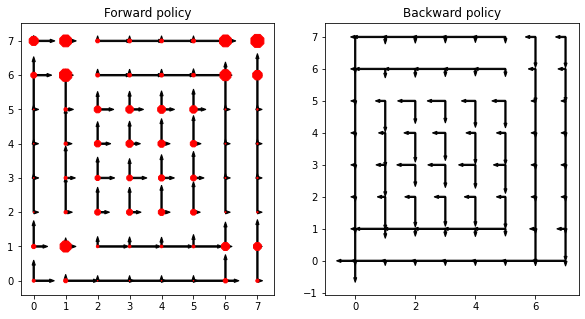

In [11]:
agent.plot_policy_2d()

63/63 [==============================] - 0s 1ms/step


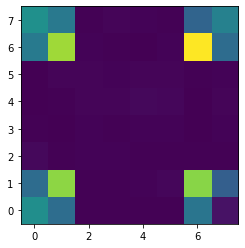

In [12]:
l1_error_after = agent.compare_env_to_model_policy()

In [13]:
print(f'L1 error before {l1_error_before:.2f} and after {l1_error_after:.2f}')

L1 error before 1.53 and after 0.20


While not perfect, the model has certainly learned to generate trajectories through the environment with probability proportional to the reward! It's a far better approximation than the untrained policy, and you can imagine that it would get better with some tweaks (e.g. more training, different optimizer, etc.)